## Data Analysis:

<p>To carry out this analysis, I have used three <b>Python Libraries</b>, namely "pandas", "scipy" and "matplotlib".</p>
<p>I have referred to the Kaggle website and Scipy website to figure out how to carry out the analysis.</p><br>
The following lines of code extract the data set from the given website and present it as a table

In [1]:
import pandas as pd
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
headings=['Sample_code_number','Clump_Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
cancer_data=pd.read_csv(url,names=headings)
cancer_data

,Sample_code_number,Clump_Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [2]:
c_mean=cancer_data.iloc[:,1:10].mean()
mean_table=pd.DataFrame(c_mean,columns=["Mean"])

In [3]:
c_mode=cancer_data.iloc[:,1:10].mode()
c_mode.index=["Mode"]
mode_table=c_mode.transpose()

In [4]:
c_stddev=cancer_data.iloc[:,1:10].std()
stddev_table=pd.DataFrame(c_stddev,columns=["Standard Deviation"])

In [5]:
c_variance=cancer_data.iloc[:,1:10].var()
var_table=pd.DataFrame(c_variance,columns=["Variance"])

In [6]:
c_skw=cancer_data.iloc[:,1:10].skew()
skw_table=pd.DataFrame(c_skw,columns=["Skew"])

## Summary
<p>This table shows the <b>Mean, Mode, Standard Deviation, Variance and Skew</b>(as calculated from the previous lines of code) for all the continuous valued features of the data set. Some of the table entries are represented as 'NaN'. This is due to missing data from the given data set</p>

In [7]:
stat_summary=pd.concat([mean_table,mode_table,stddev_table,var_table,skw_table],axis=1,sort="False").transpose()
stat_summary

,Bare Nuclei,Bland Chromatin,Clump_Thickness,Marginal Adhesion,Mitoses,Normal Nucleoli,Single Epithelial Cell Size,Uniformity of Cell Shape,Uniformity of Cell Size
Mean,NaN,3.43777,4.41774,2.80687,1.58941,2.86695,3.21602,3.20744,3.13448
Mode,1,2,1,1,1,1,2,1,1
Standard Deviation,NaN,2.43836,2.81574,2.85538,1.71508,3.05363,2.2143,2.97191,3.05146
Variance,NaN,5.94562,7.9284,8.15319,2.94149,9.32468,4.90312,8.83227,9.3114
Skew,NaN,1.09997,0.592859,1.52447,3.56066,1.42226,1.71217,1.16186,1.23314


## Pearson Correlation Coefficient (PCC)
<p>The PCC is evaluated for the following features taken in pairs:</p>
<ul>
    <li>Mitoses</li>
    <li>Uniformity of Cell Size</li>
    <li>Clump_Thickness</li>
    <li>Uniformity of Cell Shape</li>
</ul>

In [8]:
feature_mitoses=cancer_data["Mitoses"]
feature_cellsize=cancer_data["Uniformity of Cell Size"]
feature_clumpthickness=cancer_data["Clump_Thickness"]
feature_unifcellshape=cancer_data["Uniformity of Cell Shape"]

In [9]:
import scipy.stats as sp
pcc_12=sp.stats.pearsonr(feature_mitoses,feature_cellsize)
print("PCC for \"Mitoses\" Vs \"Uniformity of Cell Size\" A = ",pcc_12[0])
pcc_13=sp.stats.pearsonr(feature_mitoses,feature_clumpthickness)
print("PCC for \"Mitoses\" Vs \"Clump_Thickness\" B = ",pcc_13[0])
pcc_23=sp.stats.pearsonr(feature_cellsize,feature_clumpthickness)
print("PCC for \"Uniformity of Cell Size\" Vs \"Clump_Thickness\" C = ",pcc_23[0])
pcc_24=sp.stats.pearsonr(feature_unifcellshape,feature_cellsize)
print("PCC for \"Uniformity of Cell Shape\" Vs \"Uniformity of Cell Size\" D = ",pcc_24[0])

PCC for "Mitoses" Vs "Uniformity of Cell Size" A =  0.45869314741651
PCC for "Mitoses" Vs "Clump_Thickness" B =  0.35003385648596436
PCC for "Uniformity of Cell Size" Vs "Clump_Thickness" C =  0.6449125043512702
PCC for "Uniformity of Cell Shape" Vs "Uniformity of Cell Size" D =  0.9068819130525946


<p>From the above PCC values, it can be said that A,B and C have a weak to moderate linear relationship between them. However D is very close to 1, which indicates an almost perfect linear relation as can be seen from the data set too. The low values for A, B need not necessarily mean that they dont have a strong correlation. This could have occured due to the abscence of few data points.</p>

## Histogram Plots
<p> The histograms have been plotted for the <b>Marginal Adhesion</b> feature as shown below</p>

In [10]:
benign_patient=cancer_data.loc[cancer_data.Class==2]
malignant_patient=cancer_data.loc[cancer_data.Class==4]

In [11]:
mal_data=pd.DataFrame(malignant_patient["Marginal Adhesion"])
ben_data=pd.DataFrame(benign_patient["Marginal Adhesion"])

Text(0.5, 1.0, 'Plot for Patients diagnosed as Malignant')

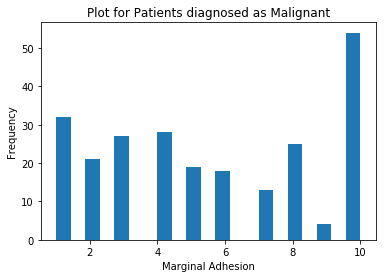

In [14]:
import matplotlib.pyplot as histogram
a=histogram.hist(mal_data["Marginal Adhesion"],bins=21,histtype='bar')
histogram.xlabel("Marginal Adhesion")
histogram.ylabel("Frequency")
histogram.title("Plot for Patients diagnosed as Malignant")

Text(0.5, 1.0, 'Plot for Patients diagnosed as Benign')

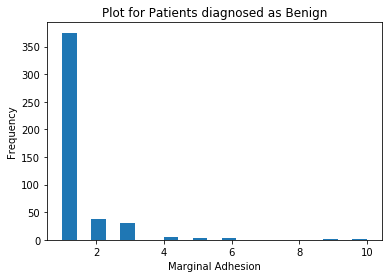

In [13]:
b=histogram.hist(ben_data["Marginal Adhesion"],bins=21,histtype='bar')
histogram.xlabel("Marginal Adhesion")
histogram.ylabel("Frequency")
histogram.title("Plot for Patients diagnosed as Benign")